In [1]:
import pandas as pd
import ptitprince as pt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import os
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

In [2]:
# settings
savefigs = True
figs_dir = '/home/claire/Documents/STUDY/EEG-Tobacco/Text Messages/skyline/Figures'



In [3]:
df = pd.read_csv ("100219_pilot.csv", sep= ",")


In [4]:
df = df.rename_axis('id').reset_index()

In [5]:
# remove useless columns
#df=df.drop(df.iloc[:, [1,2]], axis=1)
#df=df.drop(df.iloc[:, 115:145], axis=1)


In [6]:
#
comment_cols = [col for col in df.columns if "opinion" in col]
data_cols1 = [col for col in df.columns if "motivates"  in col]
data_cols2 = [col for col in df.columns if "helpful"  in col]

all_data_cols= data_cols1 + data_cols2

df_data = df[all_data_cols]
df_comm = df[comment_cols]

In [7]:
oricols =list(df_data.columns)

len(oricols)

57

In [8]:
# give useful column names
oricols =list(df_data.columns)
cols=["question"+ str(x+1) for x in range(len(oricols))]

oricom = list(df_comm.columns)
comcols=["comment"+ str(x+1) for x in range(len(oricom))]

df_data.columns=cols
df_comm.columns=comcols



In [9]:
df_data = df_data.rename_axis('id').reset_index()

In [10]:
# tidy up data frame: conversion from wide to long format
df_data=pd.wide_to_long(df_data, stubnames ="question", i="id", j="answer")

df_data.reset_index(inplace=True)





In [11]:
# fix column names order
new_cols=["id", "question", "answer"]
df_data.columns=new_cols

In [12]:
df_data.columns

Index(['id', 'question', 'answer'], dtype='object')

In [13]:
# sort by participant
#df_data.sort_values(by=['id'])

In [14]:
df_comm.columns=comcols


In [15]:
# Plotting
#----------------

TypeError: No loop matching the specified signature and casting
was found for ufunc add

<Figure size 432x288 with 0 Axes>

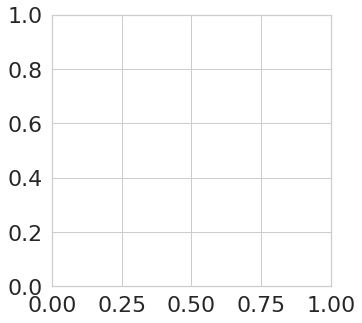

In [16]:

#for quest in [3]:
for quest in range(1,len(np.unique(df_data['question']))):
    fig = plt.figure()
    # define subplot
   # ax = fig.add_subplot(5,5,quest)
    # get a subset of the dataframe corresponding to question quest
    df_plot=df_data.loc[df_data['question'] == quest]
    dx="question"; dy="answer"; ort="h"; pal = "Set2"; sigma = .2
    ax=pt.RainCloud(x = dx, y = dy, data = df_plot, palette = pal, bw = sigma,
                     width_viol = .5, figsize = (5,5), orient = ort)
    
    ax.text(120,-0.5,oricols[quest-1], wrap=True) #to account for diff number of columns in oricols and df_data
    
    #ax.text(120,0,df_comm.iloc[df_data[quest-1]], wrap=True) #to account for diff number of columns in oricols and df_data
    
    y=-0.4
    for comment in df_comm["comment%s" % (quest)]:
        if not isinstance(comment, float): # do not write nans
            ax.text(120,y,comment)
            y += 0.1
    
    if savefigs:
        filename = 'question'+str(quest)
        plt.savefig(os.path.join(figs_dir, filename + '.jpg'), bbox_inches='tight')